# import

In [753]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score, recall_score, accuracy_score, classification_report, confusion_matrix


ModuleNotFoundError: No module named 'files'

# Download des données

## Download

In [766]:
data_prepro = pd.read_csv(r'C:\Users\loulo\OneDrive\Bureau\cours\INF8245E\competi\code\prepro.csv')
data_train= pd.read_csv(r'C:\Users\loulo\OneDrive\Bureau\cours\INF8245E\competi\train.csv', na_values=['Insert Band Name', 'Insert Band Genre', 'Insert Band Country of Origin'])
data_test = pd.read_csv(r'C:\Users\loulo\OneDrive\Bureau\cours\INF8245E\competi\test.csv', na_values=['Insert Band Name', 'Insert Band Genre', 'Insert Band Country of Origin'])
data_train
X_train = data_prepro.iloc[:170000]
y_train = data_train['Concert Enjoyment']
X_test = data_prepro.iloc[170000:]

X_train.columns

Index(['Unnamed: 0', 'Band Name', 'Band Genre', 'Band Country of Origin',
       'Band Debut', 'Concert ID', 'Concert Attendance', 'Inside Venue',
       'Rain', 'Seated', 'Personnality Trait 1', 'Personnality Trait 2',
       'Personnality Trait 3', 'Personnality Trait 4', 'Concert Goer Age',
       'Concert Goer ID', 'Height (cm)', 'Concert Goer Country of Origin'],
      dtype='object')

## Classification rapide

### Résultat 

'Concert ID' : 0.6145882352941177
'Concert ID' + 'Rain' : 0.6143529411764705
'Concert ID' + 'Rain' + 'Inside Venue' : 0.6133823529411765
'Concert ID' + 'Band Name' : 0.6140588235294118
'Concert ID' + 'Band Name' + 'Concert Goer ID' : 0.5959117647058824

In [773]:
submission = pd.DataFrame(data_test['Id'].copy())
submission['Predicted'] = y_pred_r
print(submission)
from pathlib import Path  
filepath = Path('./out_2.csv')  
submission.to_csv(filepath, index=False)


                             Id           Predicted
0       ConcertExperience_70055             Enjoyed
1       ConcertExperience_34799             Enjoyed
2      ConcertExperience_100410             Enjoyed
3      ConcertExperience_106446       Did Not Enjoy
4      ConcertExperience_127249       Did Not Enjoy
...                         ...                 ...
29995   ConcertExperience_82288       Did Not Enjoy
29996   ConcertExperience_27139       Did Not Enjoy
29997  ConcertExperience_197434             Enjoyed
29998  ConcertExperience_166029  Worst Concert Ever
29999   ConcertExperience_24025       Did Not Enjoy

[30000 rows x 2 columns]


In [751]:
#data_train= pd.read_csv(r'C:\Users\loulo\OneDrive\Bureau\cours\INF8245E\competi\code\prepro.csv', na_values=['Insert Band Name', 'Insert Band Genre', 'Insert Band Country of Origin'])
data_train.sample(frac=1)

X_train_rapide = data_train.drop(columns=['Concert Enjoyment', 'Id'])
y_train = data_train['Concert Enjoyment']
#X_train_rapide['Concert ID'].fillna(X_train_rapide['Concert ID'].mean(), inplace = True)
X_train_rapide['Concert ID'].fillna(0, inplace = True)
enc = LabelEncoder()
#enc.fit(X_train_rapide['Band Name'])
#X_train_rapide['Band Name'] = enc.transform(X_train_rapide['Band Name'])
enc.fit(X_train_rapide['Concert Goer ID'])
X_train_rapide['Concert Goer ID'] = enc.transform(X_train_rapide['Concert Goer ID'])
#X_train_rapide['Rain'].fillna(0, inplace = True)
#X_train_rapide['Inside Venue'].fillna(0, inplace = True)

KeyError: "['Band Name', 'Band Genre', 'Band Country of Origin', 'Band Debut', 'Concert Attendance', 'Seated', 'Rain', 'Inside Venue', 'Personnality Trait 1', 'Personnality Trait 2', 'Personnality Trait 3', 'Personnality Trait 4', 'Concert Goer Age', 'Height (cm)', 'Concert Goer Country of Origin', 'Concert Enjoyment'] not found in axis"

In [769]:
X_train_test = X_train.drop(columns=['Seated','Unnamed: 0' ])
X_test_test=X_test.drop(columns=['Seated','Unnamed: 0'])

In [770]:
#X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_rapide, y_train, test_size=0.2, random_state=42)
clf = RandomForestClassifier(min_samples_leaf=10 ,n_estimators= 60, max_features='log2' , max_depth=100, random_state=0, n_jobs=-1)
clf.fit(X_train_test,y_train)
y_pred_r = clf.predict(X_test_test)


In [771]:
print(y_pred_r)

['Enjoyed' 'Enjoyed' 'Enjoyed' ... 'Enjoyed' 'Worst Concert Ever'
 'Did Not Enjoy']


## Stat sur les données

In [659]:
#Stat sur nos data 
wce = data_train[data_train['Concert Enjoyment']=='Worst Concert Ever']
dne = data_train[data_train['Concert Enjoyment']=='Did Not Enjoy']
enjoy = data_train[data_train['Concert Enjoyment']=='Enjoyed']
bce = data_train[data_train['Concert Enjoyment']=='Best Concert Ever']

### Rain

In [ ]:
a = wce['Rain'].value_counts()
b = dne['Rain'].value_counts()
c = enjoy['Rain'].value_counts()
d = bce['Rain'].value_counts()

In [686]:
print(wce['Rain'].value_counts())
print(dne['Rain'].value_counts())
print(enjoy['Rain'].value_counts())
print(bce['Rain'].value_counts())

False    10035
True      6894
Name: Rain, dtype: int64
False    52993
True     14613
Name: Rain, dtype: int64
False    57522
True     10145
Name: Rain, dtype: int64
False    14858
True      2079
Name: Rain, dtype: int64


In [687]:
print(a[0]/a[1])
print(b[0]/b[1])
print(c[0]/c[1])
print(d[0]/d[1])

1.4556135770234986
3.626428522548416
5.669985214391326
7.146705146705147


### Concert ID

In [688]:
a_ci = wce['Concert ID'].value_counts()
b_ci = dne['Concert ID'].value_counts()
c_ci = enjoy['Concert ID'].value_counts()
d_ci = bce['Concert ID'].value_counts()

In [706]:
for k in range (1000): 
    print('notre',k)
    print(len(wce[wce['Concert ID']==k].value_counts()))
    print(len(dne[dne['Concert ID']==k].value_counts()))
    print(len(enjoy[enjoy['Concert ID']==k].value_counts()))
    print(len(bce[bce['Concert ID']==k].value_counts()))

notre 0
23
103
32
1
notre 1
0
7
108
33
notre 2
27
107
28
1
notre 3
24
106
28
1
notre 4
4
93
61
2
notre 5
0
19
113
23
notre 6
53
84
11
0
notre 7
0
8
91
55
notre 8
53
101
12
0
notre 9
0
30
110
14
notre 10
0
25
114
20
notre 11
70
91
3
0
notre 12
0
17
104
37
notre 13
0
5
81
74
notre 14
19
109
25
1
notre 15
0
68
81
11
notre 16
1
48
93
12
notre 17
1
76
76
6
notre 18
2
74
84
2
notre 19
1
33
105
12
notre 20
3
84
75
5
notre 21
28
102
19
0
notre 22
22
113
21
0
notre 23
0
42
92
13
notre 24
102
51
1
0
notre 25
51
82
10
0
notre 26
0
76
76
6
notre 27
2
70
80
5
notre 28
0
36
98
22
notre 29
47
105
10
0
notre 30
29
115
19
0
notre 31
14
91
48
2
notre 32
1
42
103
9
notre 33
0
17
105
34
notre 34
0
23
109
21
notre 35
46
87
14
0
notre 36
3
61
90
3
notre 37
85
67
2
0
notre 38
52
101
4
0
notre 39
43
97
9
0
notre 40
2
47
94
10
notre 41
1
96
54
1
notre 42
0
40
95
12
notre 43
0
21
99
34
notre 44
0
29
90
32
notre 45
37
104
11
0
notre 46
45
90
16
0
notre 47
32
110
23
0
notre 48
37
115
13
0
notre 49
2
66
86
8
notre

In [689]:
print(wce['Concert ID'].value_counts())
print(dne['Concert ID'].value_counts())
print(enjoy['Concert ID'].value_counts())
print(bce['Concert ID'].value_counts())

473.0    143
722.0    143
632.0    143
760.0    141
131.0    132
        ... 
503.0      1
380.0      1
875.0      1
753.0      1
178.0      1
Name: Concert ID, Length: 634, dtype: int64
614.0    140
611.0    137
209.0    133
577.0    132
327.0    132
        ... 
841.0      1
335.0      1
592.0      1
879.0      1
961.0      1
Name: Concert ID, Length: 1000, dtype: int64
127.0    138
71.0     130
428.0    129
891.0    128
419.0    127
        ... 
632.0      1
309.0      1
24.0       1
292.0      1
120.0      1
Name: Concert ID, Length: 989, dtype: int64
879.0    137
824.0    119
539.0    100
841.0     97
745.0     94
        ... 
963.0      1
561.0      1
110.0      1
14.0       1
897.0      1
Name: Concert ID, Length: 717, dtype: int64


In [671]:
dne[dne['Concert Goer ID']== 'concert_goer_1662']

,Id,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Concert Goer ID,Height (cm),Concert Goer Country of Origin,Concert Enjoyment
2653,ConcertExperience_171,The Crazy R Experience,RnB,Canada,2011.0,0.0,403.0,False,False,False,-0.472478,-0.281188,-1.986977,-1.445001,38.0,concert_goer_1662,164.0,United States of America (USA),Did Not Enjoy
37472,ConcertExperience_142940,Taking Back Autumn,Rock n Roll,United States of America (USA),1988.0,714.0,148.0,False,True,True,-0.472478,-0.281188,-1.986977,-1.445001,38.0,concert_goer_1662,164.0,United States of America (USA),Did Not Enjoy
39312,ConcertExperience_108545,Devon Thunder Thighs,Pop Music,United States of America (USA),1984.0,542.0,2980.0,False,True,True,-0.472478,-0.281188,-1.986977,-1.445001,38.0,concert_goer_1662,164.0,United States of America (USA),Did Not Enjoy
50666,ConcertExperience_110249,Devon Revival,RnB,United States of America (USA),1992.0,551.0,22026.0,True,False,False,-0.472478,-0.281188,-1.986977,-1.445001,38.0,concert_goer_1662,164.0,United States of America (USA),Did Not Enjoy
53408,ConcertExperience_126560,The Big Service,Heavy Metal,United States of America (USA),2003.0,632.0,22026.0,False,True,True,-0.472478,-0.281188,-1.986977,-1.445001,38.0,concert_goer_1662,164.0,United States of America (USA),Did Not Enjoy
54849,ConcertExperience_153277,Allo Knickers,Heavy Metal,United States of America (USA),1990.0,766.0,403.0,True,False,True,-0.472478,-0.281188,-1.986977,-1.445001,38.0,concert_goer_1662,164.0,United States of America (USA),Did Not Enjoy
62071,ConcertExperience_72756,Devon Revival,RnB,United States of America (USA),1992.0,363.0,1096.0,True,False,True,-0.472478,-0.281188,-1.986977,-1.445001,38.0,concert_goer_1662,164.0,United States of America (USA),Did Not Enjoy
62781,ConcertExperience_176031,A Dozen Running Iced Frogs,Pop Music,Canada,1998.0,880.0,22026.0,True,False,False,-0.472478,-0.281188,-1.986977,-1.445001,38.0,concert_goer_1662,164.0,United States of America (USA),Did Not Enjoy
69796,ConcertExperience_143737,Puddle of Joystick,Rock n Roll,Canada,2010.0,718.0,8103.0,True,False,True,-0.472478,-0.281188,-1.986977,-1.445001,38.0,concert_goer_1662,164.0,United States of America (USA),Did Not Enjoy
75044,ConcertExperience_93769,Devon Thunder Thighs,Pop Music,United States of America (USA),1984.0,468.0,54.0,True,False,False,-0.472478,-0.281188,-1.986977,-1.445001,38.0,concert_goer_1662,164.0,United States of America (USA),Did Not Enjoy


In [663]:
enjoy['Concert Goer ID'].value_counts()

concert_goer_255     59
concert_goer_1194    57
concert_goer_1787    56
concert_goer_432     56
concert_goer_1289    53
                     ..
concert_goer_59      15
concert_goer_67      13
concert_goer_1408    13
concert_goer_1928    10
concert_goer_695     10
Name: Concert Goer ID, Length: 2000, dtype: int64

In [664]:
bce['Concert Goer ID'].value_counts()

concert_goer_1361    34
concert_goer_1506    33
concert_goer_390     30
concert_goer_1701    29
concert_goer_450     29
                     ..
concert_goer_113      1
concert_goer_953      1
concert_goer_816      1
concert_goer_1501     1
concert_goer_1485     1
Name: Concert Goer ID, Length: 1972, dtype: int64

In [650]:
X_test

,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Concert Goer ID,Height (cm),Concert Goer Country of Origin
0,45,6,144,1980.0,350.0,2980.0,True,False,True,1.065107,0.057660,0.249639,-0.933976,74.0,654,165.0,144
1,23,2,144,2014.0,173.0,8103.0,True,True,False,-0.886947,0.801365,0.525624,0.176655,29.0,1216,151.0,66
2,30,6,24,2010.0,502.0,2980.0,True,True,False,0.744700,-0.797531,-0.034166,-0.226052,27.0,78,146.0,24
3,17,7,24,2014.0,532.0,22026.0,True,False,False,-0.134180,-0.361512,0.969404,-2.341205,38.0,353,183.0,144
4,14,5,144,1992.0,636.0,2980.0,False,False,False,1.407366,-0.084155,-0.673233,1.733714,21.0,865,177.0,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,24,2,144,1979.0,411.0,2980.0,True,False,False,-0.421714,-1.549670,-0.351770,0.132489,42.0,792,178.0,144
29996,4,2,144,1978.0,135.0,8103.0,True,False,False,0.615087,-0.047092,0.339228,0.820159,37.0,844,186.0,24
29997,12,4,144,1995.0,987.0,8103.0,False,False,True,-1.396551,-0.508627,-1.692584,1.640931,45.0,537,158.0,51
29998,28,5,144,1968.0,830.0,8103.0,False,True,False,0.168073,-0.785460,0.898273,1.608389,36.0,515,170.0,143


##### Données uniques seulement : Id tous différents 


In [447]:
"""d = {x : y  for x , y in data_test.groupby(['Id']) if len(y) > 1}
e = {x : y  for x , y in data_train.groupby(['Id']) if len(y) > 1}
print(d,e)"""

"d = {x : y  for x , y in data_test.groupby(['Id']) if len(y) > 1}\ne = {x : y  for x , y in data_train.groupby(['Id']) if len(y) > 1}\nprint(d,e)"

In [448]:
#2 minutes
"""liste_67 = data_test['Id'].unique()
liste_68 = data_train['Id'].unique()
print(len(liste_67))
print(len(liste_68))
for k in range (len(liste_67)): 
    if liste_67[k] in liste_68 : 
        print(liste_67[k])
"""


"liste_67 = data_test['Id'].unique()\nliste_68 = data_train['Id'].unique()\nprint(len(liste_67))\nprint(len(liste_68))\nfor k in range (len(liste_67)): \n    if liste_67[k] in liste_68 : \n        print(liste_67[k])\n"

# Encodage 

In [586]:
enc = LabelEncoder()
enc.fit(X_train['Concert Goer Country of Origin'])
X_train['Band Country of Origin'] = enc.transform(X_train['Band Country of Origin'])
X_train['Concert Goer Country of Origin'] = enc.transform(X_train['Concert Goer Country of Origin'])
X_test['Band Country of Origin'] = enc.transform(X_test['Band Country of Origin'])
X_test['Concert Goer Country of Origin'] = enc.transform(X_test['Concert Goer Country of Origin'])
enc.fit(X_train['Band Name'])
X_train['Band Name'] = enc.transform(X_train['Band Name'])
X_test['Band Name'] = enc.transform(X_test['Band Name'])
enc.fit(X_train['Band Genre'])
X_train['Band Genre'] = enc.transform(X_train['Band Genre'])
X_test['Band Genre'] = enc.transform(X_test['Band Genre'])
enc.fit(X_train['Concert Goer ID'])
X_train['Concert Goer ID'] = enc.transform(X_train['Concert Goer ID'])
X_test['Concert Goer ID'] = enc.transform(X_test['Concert Goer ID'])



# remplir les Nan 

In [587]:
new_df = pd.concat([X_train,X_test])

## obtenir des informations : 

In [525]:
new_df

,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Concert Goer ID,Height (cm),Concert Goer Country of Origin
0,43,3,144,1976.0,900.0,2980.0,False,False,NaN,0.330843,-0.958408,-0.943548,-1.636806,29.0,1096,140.0,104
1,2,4,144,1968.0,731.0,54.0,True,False,True,-2.069449,0.017777,-1.910675,0.610265,43.0,973,158.0,143
2,33,6,24,1955.0,NaN,162754.0,False,False,True,-0.484268,1.968772,-0.064167,-1.260871,68.0,1382,159.0,144
3,14,5,144,1992.0,704.0,8103.0,False,True,False,-0.858054,1.022827,-0.348389,-1.147251,17.0,168,150.0,24
4,2,4,144,1968.0,95.0,54.0,False,False,False,-0.793029,-1.166528,-0.043766,0.969661,59.0,1924,166.0,143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,24,2,144,1979.0,411.0,2980.0,True,False,False,-0.421714,-1.549670,-0.351770,0.132489,42.0,792,178.0,144
29996,4,2,144,1978.0,135.0,8103.0,True,False,False,0.615087,-0.047092,0.339228,0.820159,37.0,844,186.0,24
29997,12,4,144,1995.0,987.0,8103.0,False,False,True,-1.396551,-0.508627,-1.692584,1.640931,45.0,537,158.0,51
29998,28,5,144,1968.0,830.0,8103.0,False,True,False,0.168073,-0.785460,0.898273,1.608389,36.0,515,170.0,143


In [526]:
colonnes = new_df.columns

### colonne 0 : band name, no modif

In [588]:
print(colonnes[0])
results = list(new_df[colonnes[0]].value_counts())
somme =0
for k in range(len (results)): 
    somme += results[k]
print(somme)
# Pas besoins de fill

Band Name
200000


### colonne 1 : Band Genre, no modif

In [589]:
print(colonnes[1])
results = list(new_df[colonnes[1]].value_counts())
somme =0
for k in range(len (results)): 
    somme += results[k]
print(somme)
# Pas besoins de fill

Band Genre
200000


### colonne 2 : Band Country of Origin, no modif

In [590]:
print(colonnes[2])
results = list(new_df[colonnes[2]].value_counts())
somme =0
for k in range(len (results)): 
    somme += results[k]
print(somme)
# Pas besoins de fill

Band Country of Origin
200000


### Colonne 3 : Band Debut, modification 

In [720]:
print(colonnes[3])
results = list(new_df[colonnes[3]].value_counts())
results_df = new_df[colonnes[3]].value_counts()
somme =0
for k in range(len (results)): 
    somme += results[k]
print(somme)
# somme = 169143 
liste_des_bandes_sans_debut = new_df[new_df['Band Debut'].isna()]['Band Name'].unique()
for k in range (len(liste_des_bandes_sans_debut)): 
    new_df.loc[new_df[new_df['Band Name'] == liste_des_bandes_sans_debut[k]].index, 'Band Debut'] = (new_df[new_df['Band Name'] == liste_des_bandes_sans_debut[k]]['Band Debut'].value_counts()).index[0]


Band Debut
200000


### Colonne 4 : Concert ID, modification 

In [596]:
new_df[new_df['Concert ID'].isna() ]

,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Concert Goer ID,Height (cm),Concert Goer Country of Origin
2,33,6,24,2010.0,NaN,162754.0,False,False,True,-0.484268,1.968772,-0.064167,-1.260871,68.0,1382,159.0,144
6,6,1,144,1969.0,NaN,59874.0,True,False,True,1.297272,-0.387015,-1.304054,0.161344,53.0,183,158.0,24
213,32,2,24,1955.0,NaN,54.0,False,False,False,NaN,-0.074785,-0.894952,1.723226,50.0,1623,179.0,24
311,19,6,144,2003.0,NaN,2980.0,False,False,True,0.550725,-1.413046,1.316283,-0.880780,58.0,419,153.0,24
348,45,6,144,1980.0,NaN,2980.0,False,False,False,0.317535,-0.843383,1.272732,-0.102975,54.0,193,185.0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29485,8,1,144,1995.0,NaN,54.0,True,False,False,-0.459760,-0.699217,-1.330479,0.818696,42.0,1554,143.0,144
29582,2,4,144,1988.0,NaN,54.0,True,False,False,0.278648,-0.810073,0.805002,-0.272961,59.0,1739,181.0,72
29602,48,3,144,1979.0,NaN,8103.0,True,False,False,0.140518,-0.826319,-0.003560,-0.418840,35.0,779,147.0,24
29687,8,1,144,1995.0,NaN,162754.0,True,False,True,0.126390,-2.122874,-0.278856,-2.200258,64.0,1640,173.0,147


In [595]:
# 35 secondes
print(colonnes[4])
results = list(new_df[colonnes[4]].value_counts())
results_df = new_df[colonnes[4]].value_counts()
somme =0
for k in range(len (results)): 
    somme += results[k]
print(somme)
Lsci = list(new_df[new_df['Concert ID'].isna() ].index)

## On met l'ID du concert s'il a la même valeur de band name, band Genre (qui change de temps en temps pour une même band), le même inside venue, rain, concert attendance et different spectateur id. et si tout ça et de longueur 1. 
for k in range (len(Lsci)):
    if len(new_df[(X_train['Band Name'] == new_df.iloc[Lsci[k]]['Band Name']) & (new_df['Inside Venue'] ==new_df.iloc[Lsci[k]]['Inside Venue']) & (new_df['Rain'] == new_df.iloc[Lsci[k]]['Rain']) & (new_df['Concert Attendance'] == new_df.iloc[Lsci[k]]['Concert Attendance'])]['Concert ID'].value_counts()): 
        new_df.loc[Lsci[k], 'Concert ID'] = (new_df[(X_train['Band Name'] == new_df.iloc[Lsci[k]]['Band Name']) & (new_df['Inside Venue'] == new_df.iloc[Lsci[k]]['Inside Venue']) & (new_df['Rain'] == new_df.iloc[Lsci[k]]['Rain']) & (new_df['Concert Attendance'] == new_df.iloc[Lsci[k]]['Concert Attendance'])]['Concert ID'].value_counts()).index[0]


Concert ID
198972


C:\Users\loulo\AppData\Local\Temp\ipykernel_9944\250007096.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(new_df[(X_train['Band Name'] == new_df.iloc[Lsci[k]]['Band Name']) & (new_df['Inside Venue'] ==new_df.iloc[Lsci[k]]['Inside Venue']) & (new_df['Rain'] == new_df.iloc[Lsci[k]]['Rain']) & (new_df['Concert Attendance'] == new_df.iloc[Lsci[k]]['Concert Attendance'])]['Concert ID'].value_counts()):
C:\Users\loulo\AppData\Local\Temp\ipykernel_9944\250007096.py:13: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  if len(new_df[(X_train['Band Name'] == new_df.iloc[Lsci[k]]['Band Name']) & (new_df['Inside Venue'] ==new_df.iloc[Lsci[k]]['Inside Venue']) & (new_df['Rain'] == new_df.iloc[Lsci[k]]['Rain']) & (new_df['Concert Attendance'] == new_df.iloc[Lsci[k]]['Concert Attendance'])]['Concert ID'].value_counts()):


ValueError: cannot reindex on an axis with duplicate labels

In [750]:
X_train[X_train['Concert ID'].isna()]

,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Concert Goer ID,Height (cm),Concert Goer Country of Origin
2,Ron Talent,Rock n Roll,Canada,1955.0,NaN,162754.0,False,False,True,-0.484268,1.968772,-0.064167,-1.260871,68.0,concert_goer_442,159.0,United States of America (USA)
6,Big Joystick,Heavy Metal,United States of America (USA),1969.0,NaN,59874.0,True,False,True,1.297272,-0.387015,-1.304054,0.161344,53.0,concert_goer_1162,158.0,Canada
213,Ron Nor,Hip Hop/Rap,Canada,1955.0,NaN,54.0,False,False,False,NaN,-0.074785,-0.894952,1.723226,50.0,concert_goer_66,179.0,Canada
311,It's My Joystick,Rock n Roll,United States of America (USA),1983.0,NaN,2980.0,False,False,True,0.550725,-1.413046,1.316283,-0.880780,58.0,concert_goer_1375,153.0,Canada
348,The Crazy Heroes of Devon,Rock n Roll,United States of America (USA),1980.0,NaN,2980.0,False,False,False,0.317535,-0.843383,1.272732,-0.102975,54.0,concert_goer_1171,185.0,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169173,Running for the Crazy Woman,Indie/Alt Rock,United Kingdom (UK),1964.0,NaN,54.0,True,False,True,-0.541499,-0.901103,1.505191,0.268279,48.0,concert_goer_1135,165.0,Kazakhstan
169296,Crazyplay,Pop Music,United States of America (USA),1995.0,NaN,59874.0,True,True,False,0.297594,1.489030,0.868612,0.062196,63.0,concert_goer_430,152.0,Guinea-Bissau
169472,Taking Back Autumn,Rock n Roll,United States of America (USA),1988.0,NaN,403.0,False,False,False,-1.970903,-0.003465,-0.922152,-2.108648,26.0,concert_goer_1713,163.0,United States of America (USA)
169885,Crazy Frogs of Devon,Pop Music,United States of America (USA),2004.0,NaN,1096.0,True,False,False,0.063030,1.044396,-0.862513,0.886557,28.0,concert_goer_1902,179.0,United States of America (USA)


### colonne 5 : Concert Attendance, modification 

In [603]:
liste_des_bandes_sans_attendance = list(new_df[new_df['Concert Attendance'].isna()]['Concert ID'].unique())
print(liste_des_bandes_sans_attendance)
# pour enlever le 'nan' 
liste_des_bandes_sans_attendance.pop(1)
print(liste_des_bandes_sans_attendance[0])
for k in range (len(liste_des_bandes_sans_attendance)): 
    print((new_df[new_df['Concert ID'] == liste_des_bandes_sans_attendance[k]]['Concert Attendance'].value_counts()).index[0])
    new_df.loc[new_df[new_df['Concert ID'] == liste_des_bandes_sans_attendance[k]].index, 'Concert Attendance'] = (new_df[new_df['Concert ID'] == liste_des_bandes_sans_attendance[k]]['Concert Attendance'].value_counts()).index[0]


[340.0, nan, 207.0, 493.0, 103.0, 256.0, 788.0, 885.0, 832.0, 451.0, 299.0, 858.0, 329.0, 488.0, 757.0, 211.0, 522.0, 167.0, 4.0, 48.0, 13.0, 158.0, 884.0, 738.0, 828.0, 471.0, 606.0, 112.0, 487.0, 693.0, 726.0, 247.0, 346.0, 457.0, 475.0, 897.0, 280.0, 124.0, 298.0, 423.0, 953.0, 865.0, 909.0, 771.0, 659.0, 323.0, 742.0, 873.0, 538.0, 233.0, 677.0, 513.0, 195.0, 88.0, 947.0, 676.0, 628.0, 672.0, 846.0, 602.0, 58.0, 283.0, 91.0, 242.0, 238.0, 723.0, 406.0, 61.0, 501.0, 933.0, 780.0, 415.0, 113.0, 967.0, 31.0, 309.0, 135.0, 611.0, 683.0, 306.0, 186.0, 557.0, 222.0, 565.0, 916.0, 661.0, 288.0, 621.0, 212.0, 424.0, 481.0, 855.0, 939.0, 307.0, 310.0, 634.0, 769.0, 643.0, 753.0, 191.0, 984.0, 316.0, 19.0, 592.0, 254.0, 177.0, 710.0, 39.0, 37.0, 206.0, 132.0, 101.0, 449.0, 180.0, 498.0, 813.0, 863.0, 601.0, 99.0, 152.0, 721.0, 645.0, 171.0, 165.0, 662.0, 972.0, 333.0, 755.0, 81.0, 331.0, 949.0, 146.0, 867.0, 760.0, 840.0, 274.0, 911.0, 85.0, 105.0, 133.0, 189.0, 368.0, 773.0, 650.0, 176.0, 8

In [604]:
new_df[new_df['Concert Attendance'].isna()]

,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Concert Goer ID,Height (cm),Concert Goer Country of Origin
37941,51,5,144,1976.0,NaN,NaN,True,False,False,-1.426285,1.000350,2.314010,0.246974,72.0,1395,162.0,144
42311,49,2,144,1958.0,NaN,NaN,True,False,True,-1.915561,-0.146405,0.940437,0.315509,70.0,335,161.0,24
101340,0,4,24,1998.0,NaN,NaN,True,False,True,0.821976,0.351411,0.175762,1.455654,39.0,941,176.0,24


Lsca = list(X_train[X_train['Concert Attendance'].isna()].index)
Lsca[0]
new_df.iloc[186]['Concert ID']
new_df[new_df['Concert ID'] == 340]['Concert Attendance'].value_counts())

Lsca=list(X_train['Concert ID'].unique())
del Lsca[2]
liste_attend = []
for k in range (len(Lsca)): 
    print(k)
    liste_attend.append((X_train[X_train['Concert ID'] == Lsca[k]]['Concert Attendance'].value_counts()).index[0])
liste_attend

La = list(X_train[X_train['Concert Attendance'].isna()].index) 
for k in range( len(La)): 
    

for k in range (len(Lsca)): 
    id = X_train.iloc[Lsca[k]]['Concert ID']
    print((X_train[X_train['Concert ID'] == id]['Concert Attendance'].value_counts())[0])

b = int((X_train[X_train['Concert ID'] == int(a)]['Concert Attendance']).value_counts())

print(int(a))
print(b)

lsca = X_train[X_train['Concert Attendance'].isna()]['Concert ID'].unique()
lsca = list (lsca)
lsca

for k in range (len(lsca)): 
    print(X_train[X_train['Concert ID'] == lsca[k]]['Concert Attendance'].value_counts())

    X_train.loc[X_train[X_train['Concert ID'] == lsca[k]].index, 'Concert Attendance'] = (X_train[X_train['Concert ID'] == lsca[k]]['Concert Attendance'].value_counts()).index[0]

### Colonne 6 : Inside Venue, modification 

In [609]:
print(colonnes[6])
results = list(new_df[colonnes[6]].value_counts())
results_df = new_df[colonnes[6]].value_counts()
somme =0
for k in range(len (results)): 
    somme += results[k]
print(somme)

liste_des_concert_sans_venue = new_df[new_df['Inside Venue'].isna()]['Concert ID'].unique()
liste_des_concert_sans_venue = liste_des_concert_sans_venue[3:]
print(liste_des_concert_sans_venue)
for k in range (len(liste_des_concert_sans_venue)): 
    print(liste_des_concert_sans_venue[k])
    if liste_des_concert_sans_venue[k] != 'nan' : 
        new_df.loc[new_df[new_df['Concert ID'] == liste_des_concert_sans_venue[k]].index, 'Inside Venue'] = (new_df[new_df['Concert ID'] == liste_des_concert_sans_venue[k]]['Inside Venue'].value_counts()).index[0]

Inside Venue
199257
[ 81.  76. 660. 348.  34. 730. 995. 596. 710. 951. 301. 673. 165. 945.
  22. 170. 283. 100. 876. 603. 151.  67. 857. 323. 558. 683. 846. 105.
 827. 561. 922. 657. 187. 274. 714. 592. 262. 229. 329. 533. 588. 194.
 350. 885. 378. 650. 843. 771. 901. 319. 164. 989. 127.  59. 355. 189.
 641.  66. 469. 386. 331.  51. 246. 379. 894. 972. 504. 153. 906. 941.
 302. 168. 852. 895. 527. 472. 764. 781. 627. 868. 215. 621. 984. 149.
 120. 554. 692. 244. 921. 486. 950. 307. 468. 158. 625. 864.  87.  35.
 612. 665. 328. 624. 451. 694. 669. 231. 112. 914.  39. 678. 748. 803.
  64. 455. 155. 733. 339. 824. 784. 383. 677. 534. 306. 860. 851. 918.
 679. 201. 728. 320. 828. 923. 872. 813. 982. 758. 397. 272. 913. 845.
 193. 330. 429. 420. 848.  12. 264. 776. 137. 404. 454. 377. 550. 473.
 907. 463. 442. 920. 315. 932. 196. 384. 719. 392. 635. 890. 668. 753.
 705. 503. 117. 371. 583. 798. 988. 370. 682. 530. 440. 391. 590. 452.
 309. 578.   1. 726. 456. 599. 576. 658. 418. 946. 520. 7

### Colonne 7 : Rain, Modification

In [610]:
print(colonnes[7])
results = list(new_df[colonnes[7]].value_counts())
results_df = new_df[colonnes[7]].value_counts()
somme =0
for k in range(len (results)): 
    somme += results[k]
print(somme)


Rain
198996


In [611]:
liste_des_concert_sans_pluie = new_df[new_df['Rain'].isna()]['Concert ID'].unique()

In [612]:
liste_des_concert_sans_pluie

array([545., 703., 231., 931., 615., 755., 461., 907., 356., 143., 193.,
       290., 560.,  46., 927., 399., 752., 444., 267., 204., 817., 695.,
       811., 370., 647., 283., 145., 289.,  49., 431., 207.,  74., 360.,
       192., 102., 189., 796., 915.,  22., 532., 657., 582., 838., 801.,
        98., 986., 945., 452., 872., 278.,  83., 583., 722., 316., 993.,
       617., 767., 690., 483., 650., 181., 878., 776., 367., 649., 968.,
       566., 514., 320., 687.,  45., 772., 294.,  59., 513.,  29.,  23.,
       451.,  97., 969., 542.,  86.,  61., 387., 585., 201., 264., 665.,
       168., 944., 840., 230., 751., 184.,  95., 718., 180., 223., 879.,
       579., 848., 591., 322., 808.,  nan, 397., 140., 685., 782., 505.,
       178., 520., 288., 898., 586., 940.,  15.,  12., 966., 587., 857.,
       115., 849., 488., 390., 757., 364., 210., 658., 627., 179., 996.,
         1., 311., 823., 392., 330., 928., 800., 244., 303., 408., 973.,
       599., 331., 604.,  69., 802., 293., 574., 71

In [615]:
liste_des_concert_sans_venue = X_train[X_train['Rain'].isna()]['Concert ID'].unique()
liste_des_concert_sans_venue = liste_des_concert_sans_venue[2:]
for k in range (len(liste_des_concert_sans_venue)): 
    print(liste_des_concert_sans_venue[k])
    X_train.loc[X_train[X_train['Concert ID'] == liste_des_concert_sans_venue[k]].index, 'Rain'] = (X_train[X_train['Concert ID'] == liste_des_concert_sans_venue[k]]['Rain'].value_counts()).index[0]

397.0
140.0
685.0
782.0
505.0
178.0
520.0
288.0
898.0
586.0
940.0
15.0
12.0
966.0
587.0
857.0
115.0
849.0
488.0
390.0
757.0
364.0
210.0
658.0
627.0
179.0
996.0
1.0
311.0
823.0
392.0
330.0
928.0
800.0
244.0
303.0
408.0
973.0
599.0
331.0
604.0
69.0
802.0
293.0
574.0
719.0
357.0
723.0
195.0
724.0
549.0
109.0
255.0
471.0
534.0
373.0
487.0
608.0
30.0
766.0
366.0
148.0
794.0
819.0
477.0
640.0
674.0
421.0
568.0
241.0
345.0
942.0
741.0
875.0
127.0
905.0
809.0
726.0
247.0
216.0
805.0
65.0
317.0
44.0
275.0
419.0
227.0
812.0
775.0
116.0
508.0
890.0
270.0
440.0
321.0
26.0
759.0
31.0
307.0
804.0
481.0
593.0
386.0
971.0
833.0
727.0
792.0
240.0
151.0
988.0
981.0
643.0
895.0
667.0
594.0
664.0
157.0
689.0
994.0
246.0
896.0
502.0
853.0
163.0
498.0
150.0
324.0
739.0
239.0
590.0
185.0
339.0
351.0
855.0
72.0
900.0
787.0
280.0
908.0
213.0
215.0
922.0
600.0
10.0
779.0
610.0
314.0
108.0
561.0
245.0
588.0
517.0
894.0
233.0
96.0
891.0
683.0
540.0
933.0
962.0
139.0
551.0
493.0
645.0
876.0
449.0
249.0
605.0
125.0

### Colonne 8 : Seated, No modif

In [558]:
print(colonnes[8])
results = list(X_train[colonnes[8]].value_counts())
results_df = X_train[colonnes[8]].value_counts()
somme =0
for k in range(len (results)): 
    somme += results[k]
print(somme)

Seated
169168


### Colonnes 9,10,11,12 : Personnality trait 

In [616]:
new_df

,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Concert Goer ID,Height (cm),Concert Goer Country of Origin
0,43,3,144,1980.0,900.0,2980.0,True,False,NaN,0.330843,-0.958408,-0.943548,-1.636806,29.0,1096,140.0,104
1,2,4,144,1968.0,731.0,8103.0,True,False,True,-2.069449,0.017777,-1.910675,0.610265,43.0,973,158.0,143
2,33,6,24,2010.0,NaN,162754.0,False,False,True,-0.484268,1.968772,-0.064167,-1.260871,68.0,1382,159.0,144
3,14,5,144,2014.0,704.0,22026.0,True,True,False,-0.858054,1.022827,-0.348389,-1.147251,17.0,168,150.0,24
4,2,4,144,1968.0,95.0,54.0,False,False,False,-0.793029,-1.166528,-0.043766,0.969661,59.0,1924,166.0,143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,24,2,144,2006.0,411.0,54.0,True,False,False,-0.421714,-1.549670,-0.351770,0.132489,42.0,792,178.0,144
29996,4,2,144,1978.0,135.0,8103.0,True,False,False,0.615087,-0.047092,0.339228,0.820159,37.0,844,186.0,24
29997,12,4,144,1995.0,987.0,8103.0,False,False,True,-1.396551,-0.508627,-1.692584,1.640931,45.0,537,158.0,51
29998,28,5,144,1968.0,830.0,8103.0,True,True,False,0.168073,-0.785460,0.898273,1.608389,36.0,515,170.0,143


In [617]:
new_df[new_df['Personnality Trait 1'].isna()]

,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Concert Goer ID,Height (cm),Concert Goer Country of Origin
14,29,5,144,1992.0,817.0,403.0,False,False,True,NaN,0.427680,-0.216587,-0.984782,72.0,703,172.0,24
213,32,2,24,1955.0,NaN,162754.0,False,False,False,NaN,-0.074785,-0.894952,1.723226,50.0,1623,179.0,24
231,46,5,24,2004.0,336.0,59874.0,False,False,True,NaN,0.837255,-0.647543,0.280170,47.0,1132,163.0,144
263,29,5,144,1992.0,670.0,2980.0,False,True,False,NaN,0.988678,0.175199,1.183675,41.0,1095,176.0,24
798,30,7,24,1995.0,616.0,8103.0,True,False,True,NaN,-0.922455,0.181236,-0.380807,74.0,541,150.0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29222,34,6,144,1980.0,804.0,22026.0,False,True,True,NaN,0.559403,-1.047101,-2.091502,20.0,1612,156.0,24
29427,48,3,144,1991.0,7.0,54.0,True,False,False,NaN,-0.573025,-0.424632,0.383247,52.0,277,142.0,24
29594,34,6,144,2004.0,566.0,54.0,True,True,True,NaN,-0.851221,1.023419,1.738398,49.0,394,156.0,24
29736,27,2,144,1990.0,284.0,22026.0,False,True,True,NaN,-0.457390,-0.148400,0.054933,47.0,878,161.0,25


In [502]:
Lscp = list(X_train[X_train['Personnality Trait 1'].isna()].index)
Lscp

[14,
 213,
 231,
 263,
 798,
 974,
 1060,
 1110,
 1661,
 1811,
 2029,
 2049,
 2170,
 2192,
 2232,
 2533,
 2586,
 2607,
 2728,
 3820,
 4004,
 4033,
 4284,
 4473,
 4499,
 4589,
 4706,
 4807,
 5110,
 5135,
 5150,
 5475,
 5506,
 5690,
 6663,
 6797,
 6884,
 7046,
 7648,
 7705,
 7715,
 7922,
 8088,
 8380,
 8413,
 8607,
 10264,
 10505,
 10515,
 10528,
 10645,
 10795,
 11208,
 11310,
 11502,
 11851,
 11923,
 11947,
 11968,
 11976,
 12095,
 12303,
 12655,
 12832,
 12899,
 12989,
 13394,
 13872,
 14061,
 14295,
 14359,
 15033,
 15399,
 15501,
 15508,
 15606,
 15766,
 15897,
 15989,
 16127,
 16647,
 17439,
 17568,
 17965,
 18241,
 18573,
 18806,
 18830,
 19123,
 19194,
 19354,
 19393,
 19715,
 19752,
 20139,
 20168,
 20272,
 20375,
 20797,
 20844,
 21179,
 21304,
 21345,
 21529,
 21773,
 22200,
 22278,
 22399,
 22852,
 23153,
 23258,
 23546,
 23557,
 24156,
 24336,
 24424,
 24651,
 24730,
 24760,
 25183,
 25232,
 25368,
 25405,
 25518,
 25705,
 26162,
 26203,
 26249,
 26381,
 26387,
 26660,
 2697

In [507]:
a = X_train.iloc[14]['Concert Goer ID']

In [512]:
(X_train[X_train['Concert Goer ID'] == a]['Personnality Trait 1'].value_counts()).index[0]

-0.0786919750100044

In [618]:
Lscp = list(new_df[new_df['Personnality Trait 1'].isna()].index)
for m in range (len(Lscp)): 
    inter_1 = new_df.iloc[Lscp[m]]['Concert Goer ID']
    inter_2 = (new_df[new_df['Concert Goer ID'] == inter_1]['Personnality Trait 1'].value_counts()).index[0]
    new_df.loc[Lscp[m], 'Personnality Trait 1']= inter_2

Lscp2 = list(new_df[new_df['Personnality Trait 2'].isna()].index)
for n in range (len(Lscp2)): 
    inter_3 = new_df.iloc[Lscp2[n]]['Concert Goer ID']
    inter_4 = (new_df[new_df['Concert Goer ID'] == inter_3]['Personnality Trait 2'].value_counts()).index[0]
    new_df.loc[Lscp2[n], 'Personnality Trait 2']= inter_4

Lscp3 = list(new_df[new_df['Personnality Trait 3'].isna()].index)
for o in range (len(Lscp3)): 
    inter_5 = new_df.iloc[Lscp3[o]]['Concert Goer ID']
    inter_6 = (new_df[new_df['Concert Goer ID'] == inter_5]['Personnality Trait 3'].value_counts()).index[0]
    new_df.loc[Lscp3[o], 'Personnality Trait 3']= inter_6

Lscp4 = list(new_df[new_df['Personnality Trait 4'].isna()].index)
for p in range (len(Lscp4)): 
    inter_7 = new_df.iloc[Lscp4[p]]['Concert Goer ID']
    inter_8 = (new_df[new_df['Concert Goer ID'] == inter_7]['Personnality Trait 4'].value_counts()).index[0]
    new_df.loc[Lscp4[p], 'Personnality Trait 4']= inter_8

In [561]:
new_df[new_df['Personnality Trait 1'].isna()]

,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Concert Goer ID,Height (cm),Concert Goer Country of Origin


### Colonne 13 : Concert Goer Age, modification

In [619]:
print(colonnes[13])
results = list(new_df[colonnes[13]].value_counts())
results_df = new_df[colonnes[13]].value_counts()
somme =0
for k in range(len (results)): 
    somme += results[k]
print(somme)
liste_des_gens_sans_age = new_df[new_df['Concert Goer Age'].isna()]['Concert Goer ID'].unique()
for k in range (len(liste_des_gens_sans_age)): 
    new_df.loc[new_df[new_df['Concert Goer ID'] == liste_des_gens_sans_age[k]].index, 'Concert Goer Age'] = (new_df[new_df['Concert Goer ID'] == liste_des_gens_sans_age[k]]['Concert Goer Age'].value_counts()).index[0]

Concert Goer Age
199021


### Colonne 14 : Concert Goer ID, no modif

In [621]:
print(colonnes[14])
results = list(new_df[colonnes[15]].value_counts())
results_df = new_df[colonnes[15]].value_counts()
somme =0
for k in range(len (results)): 
    somme += results[k]
print(somme)
# aucun NaN, aucune modif

Concert Goer ID
199013


### Colonne 15 : Height (cm), Modification

In [622]:
new_df[new_df['Height (cm)'].isna()]

,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Concert Goer ID,Height (cm),Concert Goer Country of Origin
327,39,3,143,1955.0,9.0,59874.0,True,True,True,0.665852,-0.353096,-0.662988,0.768665,74.0,527,NaN,24
500,50,2,144,1995.0,776.0,22026.0,False,False,True,1.260854,-2.121217,-1.118668,-0.740654,39.0,1119,NaN,24
1490,12,4,144,1995.0,729.0,403.0,False,False,False,-0.022594,-1.550281,-0.363448,-0.683181,19.0,1745,NaN,140
1777,0,4,24,1968.0,627.0,54.0,False,False,True,-0.806195,1.849771,-0.714196,-0.358395,56.0,937,NaN,144
2022,52,1,24,1978.0,515.0,1096.0,False,False,True,-1.328862,0.656785,-0.366950,-2.252568,35.0,1416,NaN,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28654,10,5,24,1990.0,979.0,1096.0,False,True,False,1.268392,-0.861794,1.458466,-1.300193,27.0,1983,NaN,24
28907,51,5,144,1976.0,151.0,8103.0,True,False,False,0.744700,-0.797531,-0.034166,-0.226052,27.0,78,NaN,24
29119,7,4,24,1969.0,402.0,8103.0,False,False,True,-0.088764,0.053162,-0.993773,0.570630,70.0,95,NaN,24
29316,19,6,144,1995.0,500.0,8103.0,True,True,False,0.981505,0.309393,1.579118,-0.803883,63.0,1334,NaN,24


In [623]:
print(colonnes[15])
results = list(new_df[colonnes[15]].value_counts())
results_df = new_df[colonnes[15]].value_counts()
somme =0
for k in range(len (results)): 
    somme += results[k]
print(somme)
liste_des_gens_sans_taille = new_df[new_df['Height (cm)'].isna()]['Concert Goer ID'].unique()
for k in range (len(liste_des_gens_sans_taille )): 
    new_df.loc[new_df[new_df['Concert Goer ID'] == liste_des_gens_sans_taille[k]].index, 'Height (cm)'] = (new_df[new_df['Concert Goer ID'] == liste_des_gens_sans_taille[k]]['Height (cm)'].value_counts()).index[0]

Height (cm)
199013


# Model

In [624]:
x_train = new_df[:150000]
x_val = new_df[150000:170000]

Y_train = y_train[:150000]
Y_val = y_train[150000:170000]
x_test = new_df[170000:]

In [637]:
x_2 = new_df[:170000]


In [639]:
for name in ['Inside Venue','Rain','Seated']:
  x_train[name].fillna(0, inplace = True)
  x_test[name].fillna(0, inplace = True)
  x_val[name].fillna(0, inplace = True)
  x_2[name].fillna(0, inplace = True)
for name in ['Band Debut',	'Concert ID',	'Concert Attendance', 'Personnality Trait 1',	'Personnality Trait 2',	\
                        'Personnality Trait 3',	'Personnality Trait 4',	'Concert Goer Age',	'Height (cm)']:
  x_train[name].fillna(X_train[name].mean(), inplace = True)
  x_test[name].fillna(X_test[name].mean(), inplace = True)
  x_val[name].fillna(X_test[name].mean(), inplace = True)
  x_2[name].fillna(X_test[name].mean(), inplace = True)
for name in ['Band Name', 'Band Genre', 'Band Country of Origin', 'Concert Goer Country of Origin','Concert Goer ID']:
  x_train[name].fillna(method="ffill", inplace = True)
  x_test[name].fillna(method="ffill", inplace = True)
  x_val[name].fillna(method="ffill", inplace = True)
  x_2[name].fillna(method="ffill", inplace = True)

C:\Users\loulo\AppData\Local\Temp\ipykernel_9944\3263763523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[name].fillna(0, inplace = True)
C:\Users\loulo\AppData\Local\Temp\ipykernel_9944\3263763523.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[name].fillna(0, inplace = True)
C:\Users\loulo\AppData\Local\Temp\ipykernel_9944\3263763523.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_val[name].fillna(0, in

In [752]:
clf = RandomForestClassifier(min_samples_leaf=10 ,n_estimators= 60, max_features='log2' , max_depth=100, random_state=0, n_jobs=-1)
clf.fit(x_2,y_train)

RandomForestClassifier(max_depth=100, max_features='log2', min_samples_leaf=10,
                       n_estimators=60, n_jobs=-1, random_state=0)

In [641]:
y_pred = clf.predict(x_test)

In [649]:
y_pred

,0
0,Best Concert Ever
1,Enjoyed
2,Enjoyed
3,Did Not Enjoy
4,Did Not Enjoy
...,...
29995,Did Not Enjoy
29996,Did Not Enjoy
29997,Enjoyed
29998,Did Not Enjoy


In [651]:
submission = pd.DataFrame(data_test['Id'].copy())
submission['Predicted'] = y_pred
print(submission)
from pathlib import Path  
filepath = Path('./out.csv')  
submission.to_csv(filepath, index=False)
files.download(filepath) 

                             Id          Predicted
0       ConcertExperience_70055  Best Concert Ever
1       ConcertExperience_34799            Enjoyed
2      ConcertExperience_100410            Enjoyed
3      ConcertExperience_106446      Did Not Enjoy
4      ConcertExperience_127249      Did Not Enjoy
...                         ...                ...
29995   ConcertExperience_82288      Did Not Enjoy
29996   ConcertExperience_27139      Did Not Enjoy
29997  ConcertExperience_197434            Enjoyed
29998  ConcertExperience_166029      Did Not Enjoy
29999   ConcertExperience_24025      Did Not Enjoy

[30000 rows x 2 columns]


NameError: name 'files' is not defined

In [646]:
y_pred = pd.DataFrame(y_pred)

In [648]:
y_pred.to_csv(r'C:\Users\loulo\OneDrive\Bureau\cours\INF8245E\competi\sub.csv')

In [635]:
f1 = f1_score(Y_val, y_pred, average='micro')

In [636]:
print(f1)

0.65745


Feature: 0 Band Name, Score: 0.19456
Feature: 1 Band Genre, Score: 0.08530
Feature: 2 Band Country of Origin, Score: 0.04156
Feature: 3 Band Debut, Score: 0.10535
Feature: 4 Concert ID, Score: 0.07089
Feature: 5 Concert Attendance, Score: 0.03659
Feature: 6 Inside Venue, Score: 0.02221
Feature: 7 Rain, Score: 0.02872
Feature: 8 Seated, Score: 0.01830
Feature: 9 Personnality Trait 1, Score: 0.04706
Feature: 10 Personnality Trait 2, Score: 0.04674
Feature: 11 Personnality Trait 3, Score: 0.05454
Feature: 12 Personnality Trait 4, Score: 0.04583
Feature: 13 Concert Goer Age, Score: 0.07514
Feature: 14 Concert Goer ID, Score: 0.04603
Feature: 15 Height (cm), Score: 0.03862
Feature: 16 Concert Goer Country of Origin, Score: 0.04257


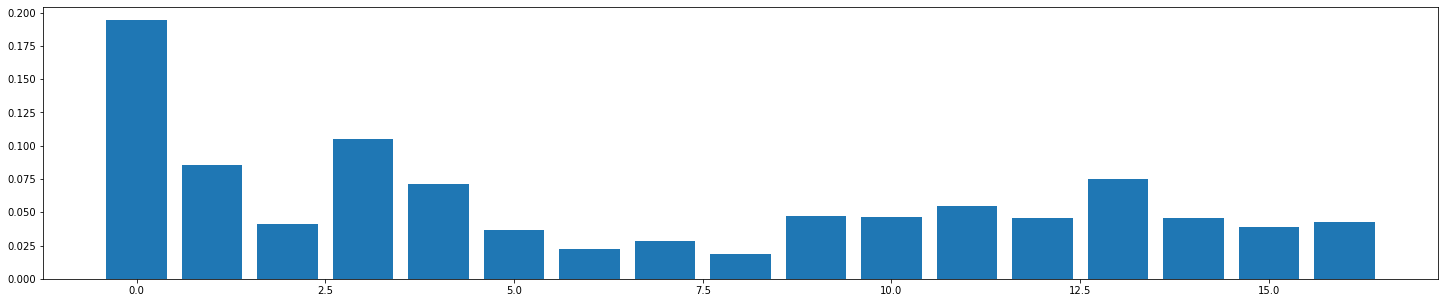

In [629]:
from matplotlib import pyplot
col = list(x_train.columns)
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d %s, Score: %.5f' % (i,col[i],v))
 # plot feature importance
pyplot.figure(figsize=[25.0, 5.0])
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()